# YouTube Recommendation System's Evolutionary Dynamics

## Imports

In [2]:
from recommendation_systems_evolutionary_dynamics import EGT
import numpy as np
import matplotlib.pylab as plt


## Initialize Game
1. Strategies counts for each populations (imiplicitly defining populations sizes)
2. actions names
3. players names
4. payoff matrix

In [52]:
strategies_countss = [[50, 50], [50, 50], [50, 50]]
actions_names = [["Defect", "Cooperate"], ["Defect", "Cooperate"], ["Defect", "Cooperate"]]
actions_symbols = [["D", "C"], ["D", "C"], ["D", "C"]]
players_names = ["Public", "Private", "Civil"]

br = 0.8
bs = 0.4 # 0.2
cs = 0.15 # 0.1
ct = 0.15 # 0.4 or 0.2 or 0.0
a = 0.2 # 0.05

payoff_matrix = {
    (0, 0, 0): [0, a,  a],  
    (0, 0, 1): [0,  0,  0],   
    (0, 1, 0): [0, -ct,  0],   
    (0, 1, 1): [0,  a-ct,  a],   

    (1, 0, 0): [0,  a,  a],  
    (1, 0, 1): [br-cs, 0,  bs],   
    (1, 1, 0): [-cs,  bs-ct,  0],   
    (1, 1, 1): [br-2*cs, a+bs-ct,  a+bs], 
}



game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

Ps = game.get_populations()
Ps = np.array(Ps)

for i, P in enumerate(Ps):
    print(f"P{i}: {np.unique(P, return_counts=True)}")
print(game.get_payoff_matrix())

P0: (array([0, 1]), array([50, 50]))
P1: (array([0, 1]), array([50, 50]))
P2: (array([0, 1]), array([50, 50]))
{(0, 0, 0): [0, 0.2, 0.2], (0, 0, 1): [0, 0, 0], (0, 1, 0): [0, -0.15, 0], (0, 1, 1): [0, 0.05000000000000002, 0.2], (1, 0, 0): [0, 0.2, 0.2], (1, 0, 1): [0.65, 0, 0.4], (1, 1, 0): [-0.15, 0.25, 0], (1, 1, 1): [0.5, 0.45000000000000007, 0.6000000000000001]}


## Evolutionary Dynamics (Finite Populations)

### Moran Process

#### Birth_Death Async

In [ ]:
steps = 1000
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "bd", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Birth-Death Async)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Birth-Death Async)")

#### Birth_Death Sync

In [ ]:
steps = 400
rep = 20

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "bd", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Birth-Death Sync)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Birth-Death Sync)")

#### Death-Birth Async

In [ ]:
steps = 1000
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "db", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Death-Birth Async)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Death-Birth Async)")

#### Death-Birth Sync

In [ ]:
steps = 800
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "db", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Death-Birth Sync)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Death-Birth Sync)")

#### Pairwise Async

In [13]:
steps = 1000
rep = 20

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "pairwise", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

Replicate: 4
Replicate: 8
Replicate: 12
Replicate: 16


##### Evolution Visualization

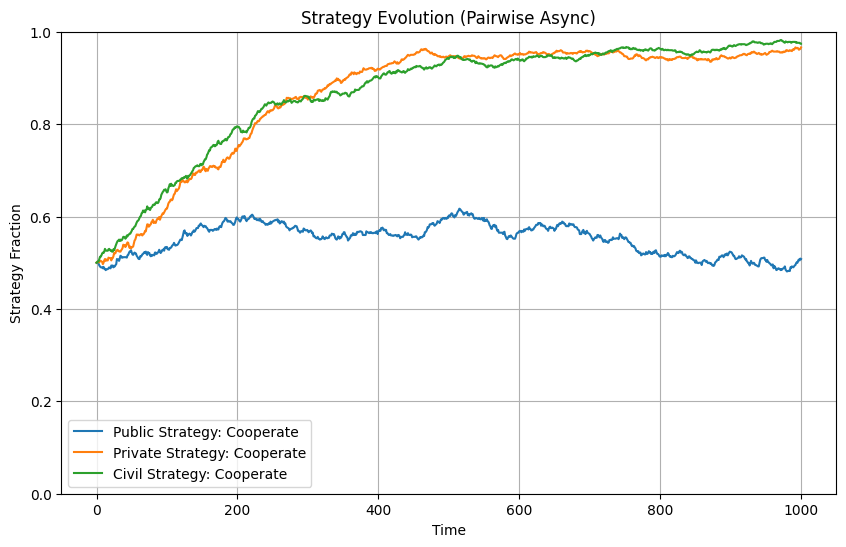

In [15]:
actions = [1,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Pairwise Async)")

##### Stationary Distribution

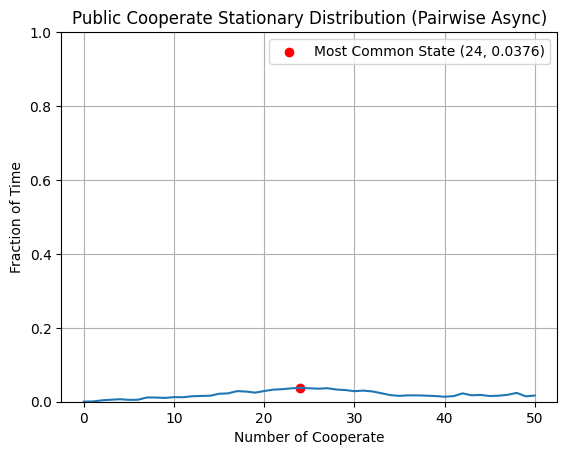

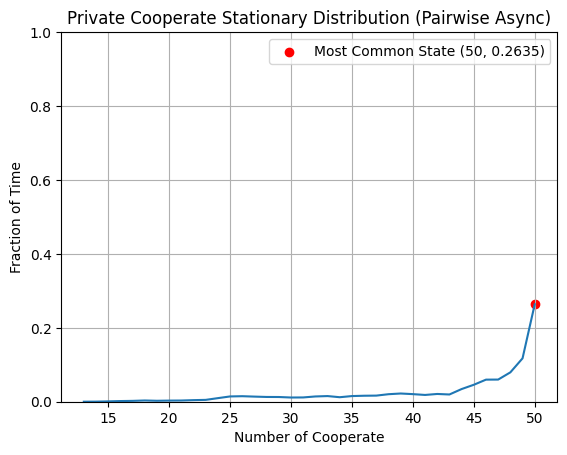

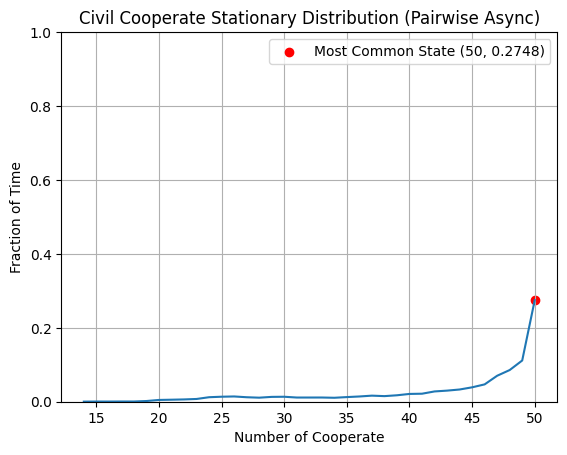

In [16]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Pairwise Async)")

#### Pairwise Sync

In [ ]:
steps = 400
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "pairwise", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Pairwise Sync)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Pairwise Sync)")

### Transition Matrix (Embedded Markov Chain)

In [53]:
matrix, states = game.compute_trans_matrix(beta=0.08)
print(states)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


#### Embedded Markov Chain Visualization

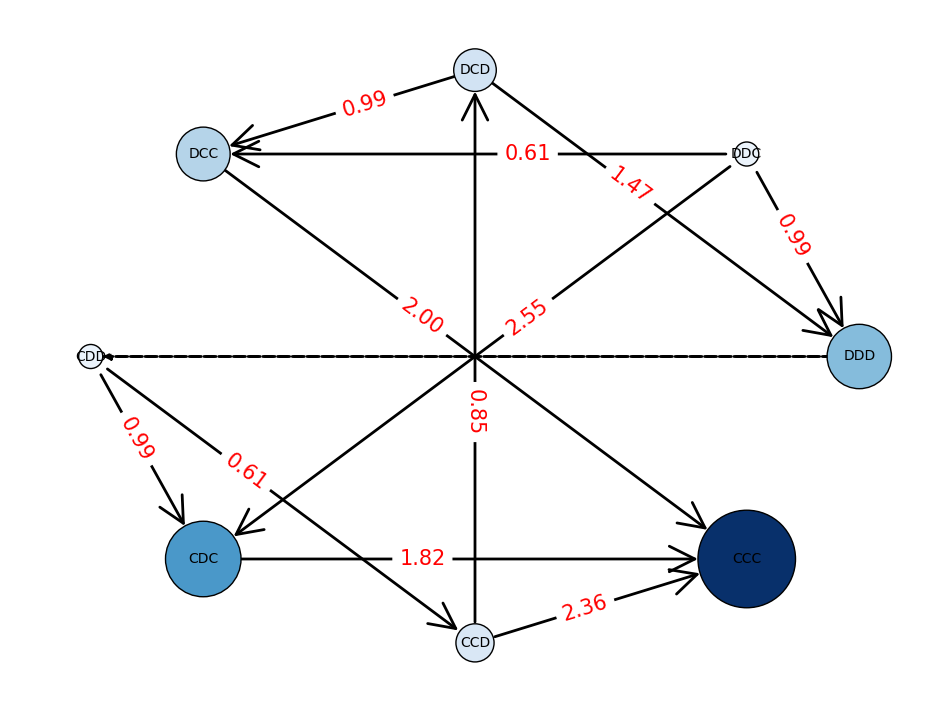

In [54]:
game.plot_transition_matrix(matrix, states=states, actions_symbols=actions_symbols, scale=150)

##### Most probable route given a starting state and an ending state

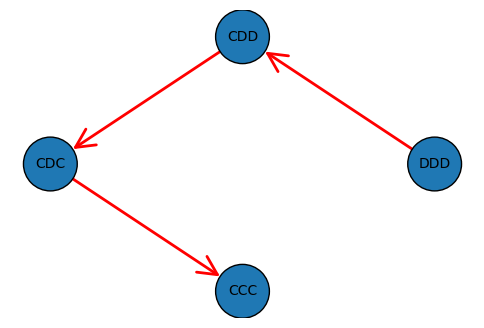

In [55]:
start_state = (0,0,0)
end_state = (1,1,1)
game.plot_transition_matrix_most_probable_route_from_i_to_j(matrix, states, actions_symbols, start_state, end_state, scale=40)

##### Most probable route given a starting state

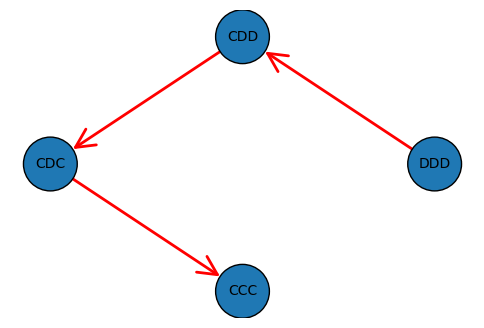

In [56]:
start_state = (0,0,0)
game.plot_transition_matrix_most_probable_route_from_i(matrix, states, actions_symbols, start_state, scale=40)

#### Stationary distrtibution from Transition Matrix 

In [57]:
stationary_distribution = game.compute_stationary_distribution(matrix)
stationary_distribution

array([0.04526364, 0.00876147, 0.01654845, 0.01072419, 0.03140938,
       0.03980927, 0.02712354, 0.82036006])

##### Visualize Stationary Distributions

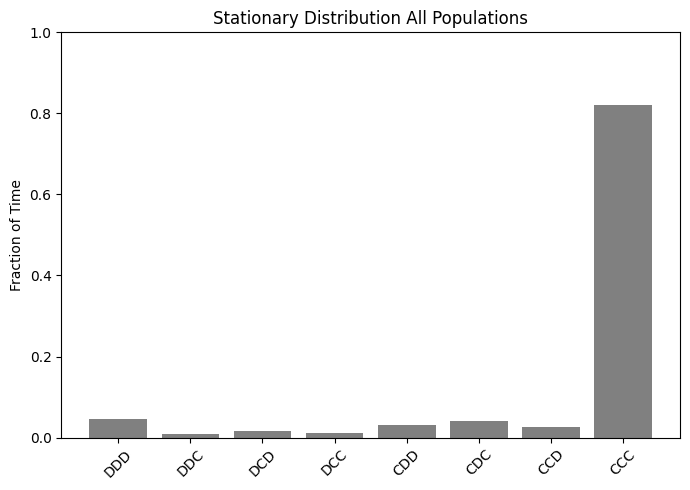

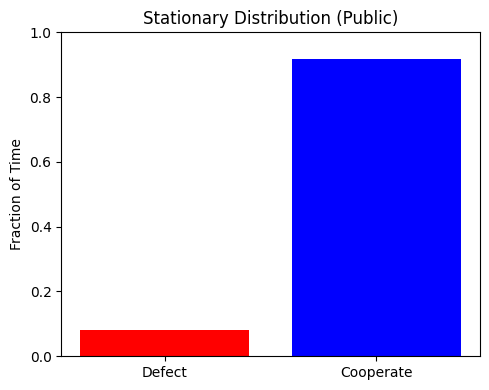

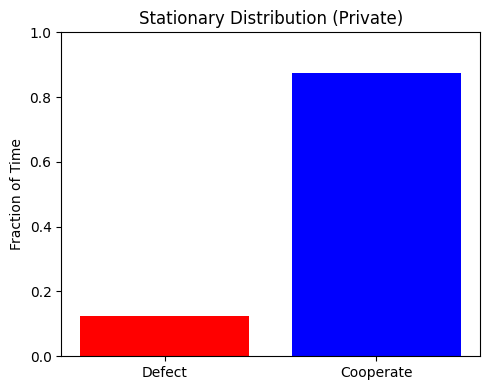

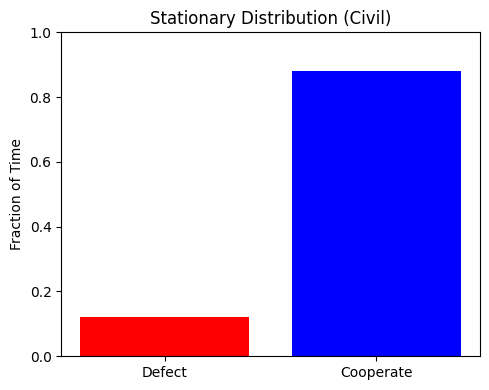

In [58]:
green = []
red = []

game.plot_stationary_distribution_all_pop(stationary_distribution, actions_symbols=actions_symbols, states=states, title="Stationary Distribution All Populations", ylabel="Fraction of Time", red=red, green=green)

for player in range(len(players_names)):
    game.plot_stationary_distribution_per_pop(stationary_distribution, player=player, actions_symbols=actions_symbols, states=states, title=f"Stationary Distribution ({players_names[player]})", ylabel="Fraction of Time")

### Gradient of Selection (for 3-population 2 actions games)

In [37]:
strategies_countss = [[5, 5], [5, 5], [5, 5]]

game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

Ps = game.get_populations()
for i, P in enumerate(Ps):
    print(f"P{i}: {np.unique(P, return_counts=True)}")
print(game.get_payoff_matrix())

beta = 2.5
mu = 0.02
X, Y, Z, G1, G2, G3 = game.compute_gradient_of_selection(beta, mu)

P0: (array([0, 1]), array([5, 5]))
P1: (array([0, 1]), array([5, 5]))
P2: (array([0, 1]), array([5, 5]))
{(0, 0, 0): [0, 0.2, 0.2], (0, 0, 1): [0, 0, 0], (0, 1, 0): [0, -0.15, 0], (0, 1, 1): [0, 0.05000000000000002, 0.2], (1, 0, 0): [0, 0.2, 0.2], (1, 0, 1): [0.65, 0, 0.4], (1, 1, 0): [-0.15, 0.25, 0], (1, 1, 1): [0.5, 0.45000000000000007, 0.6000000000000001]}


#### Visualize Gradient of Selection

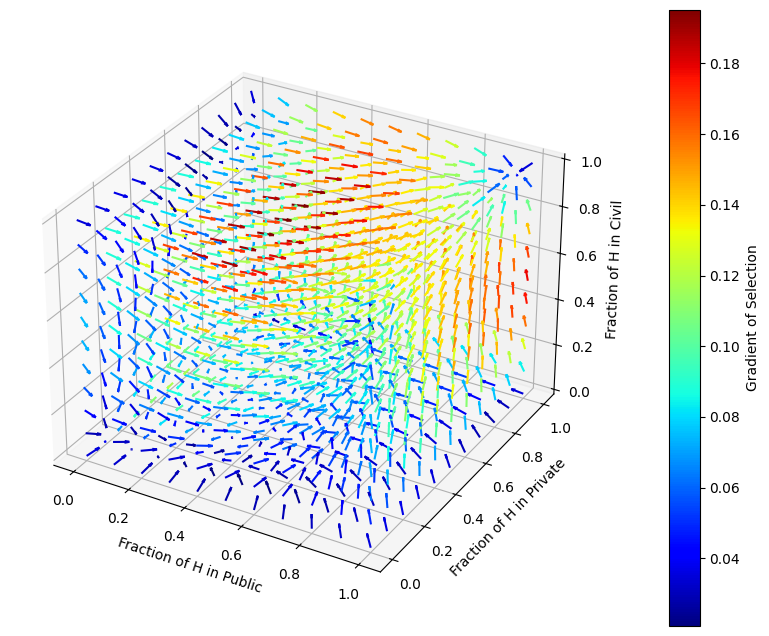

In [38]:
game.plot_gradient_of_selection(X, Y, Z, G1, G2, G3, players_names=players_names, fraction_name="H", legend="Gradient of Selection", threshold=0.00)